In [1]:
%matplotlib inline

import gym
import matplotlib
import numpy as np
import sys

from collections import defaultdict

if "../" not in sys.path:
  sys.path.append("../") 
from lib.envs.blackjack import BlackjackEnv
from lib import plotting

matplotlib.style.use('ggplot')

In [2]:
env = BlackjackEnv()

In [3]:
def mc_prediction(policy, env, num_episodes, discount_factor=1.0):
    """
    Monte Carlo prediction algorithm. Calculates the value function
    for a given policy using sampling.
    
    Args:
        policy: A function that maps an observation to action probabilities.
        env: OpenAI gym environment.
        num_episodes: Nubmer of episodes to sample.
        discount_factor: Lambda discount factor.
    
    Returns:
        A dictionary that maps from state -> value.
        The state is a tuple and the value is a float.
    """

    # Keeps track of sum and count of returns for each state
    # to calculate an average. We could use an array to save all
    # returns (like in the book) but that's memory inefficient.
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    
    # The final value function
    V = defaultdict(float)
    
    # Generate episodes using fixed policy 
    for _ in range(num_episodes):

        # Start blackjack 
        state = env.reset()   # (player_score, dealer_card[0], usable_ace)
        episode = []
        while(True):
            
            # First-visit
            if not state in episode:
                episode.append(state)
                returns_count[state] += 1
                
            action = policy(state)
            state, reward, done, _ = env.step(action)
            
            # Add reward to calculate return 
            for s in episode:
                returns_sum[s] += reward
                
            # End blackjack
            if done:
                break
    
    # Average return
    for state  in returns_sum.keys():
        V[state] = returns_sum[state] / float(returns_count[state])
        
    return V

![alt text](jpg/mc_policy_eval.jpg)

In [5]:
def sample_policy(observation):
    """
    A policy that sticks if the player score is > 20 and hits otherwise.
    """
    score, dealer_score, usable_ace = observation
    return 0 if score >= 20 else 1

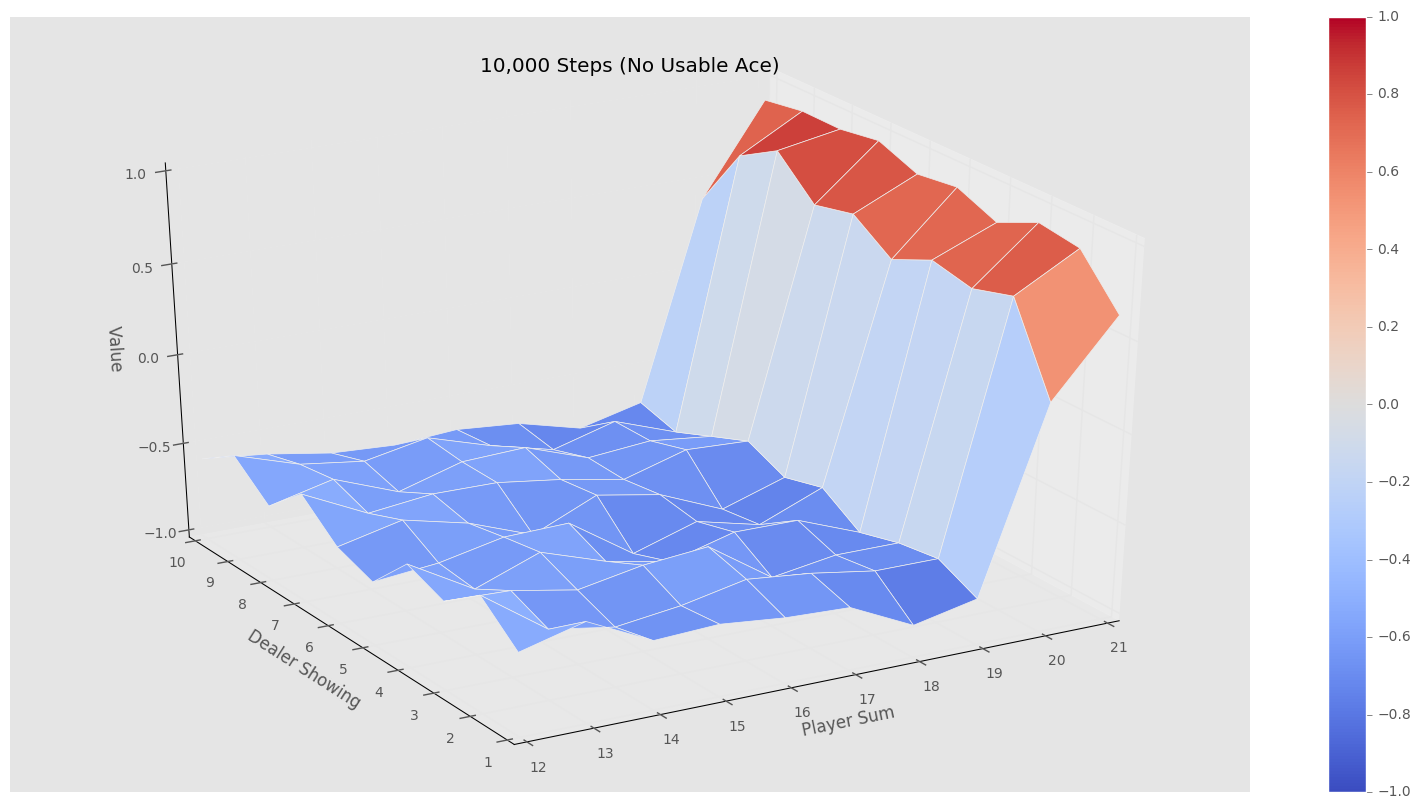

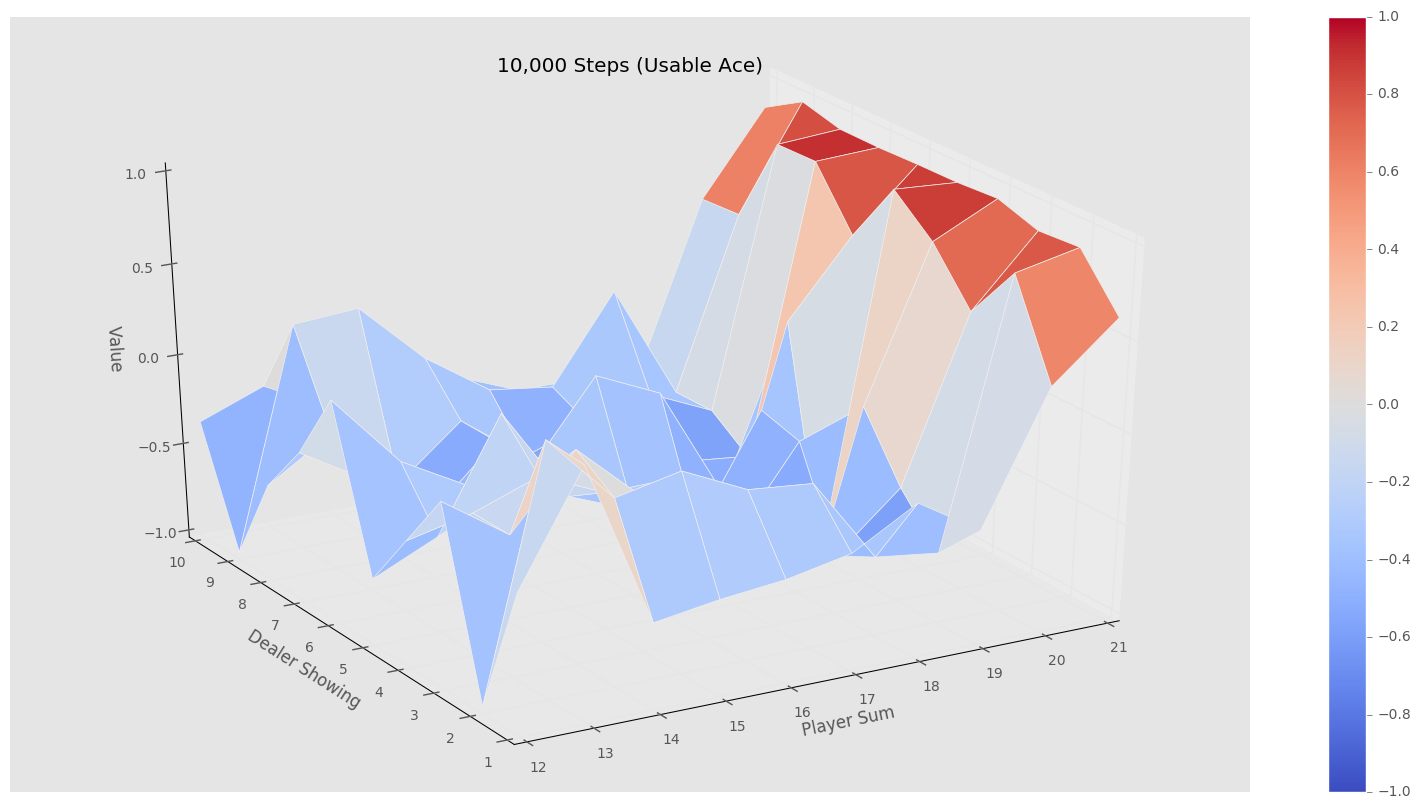

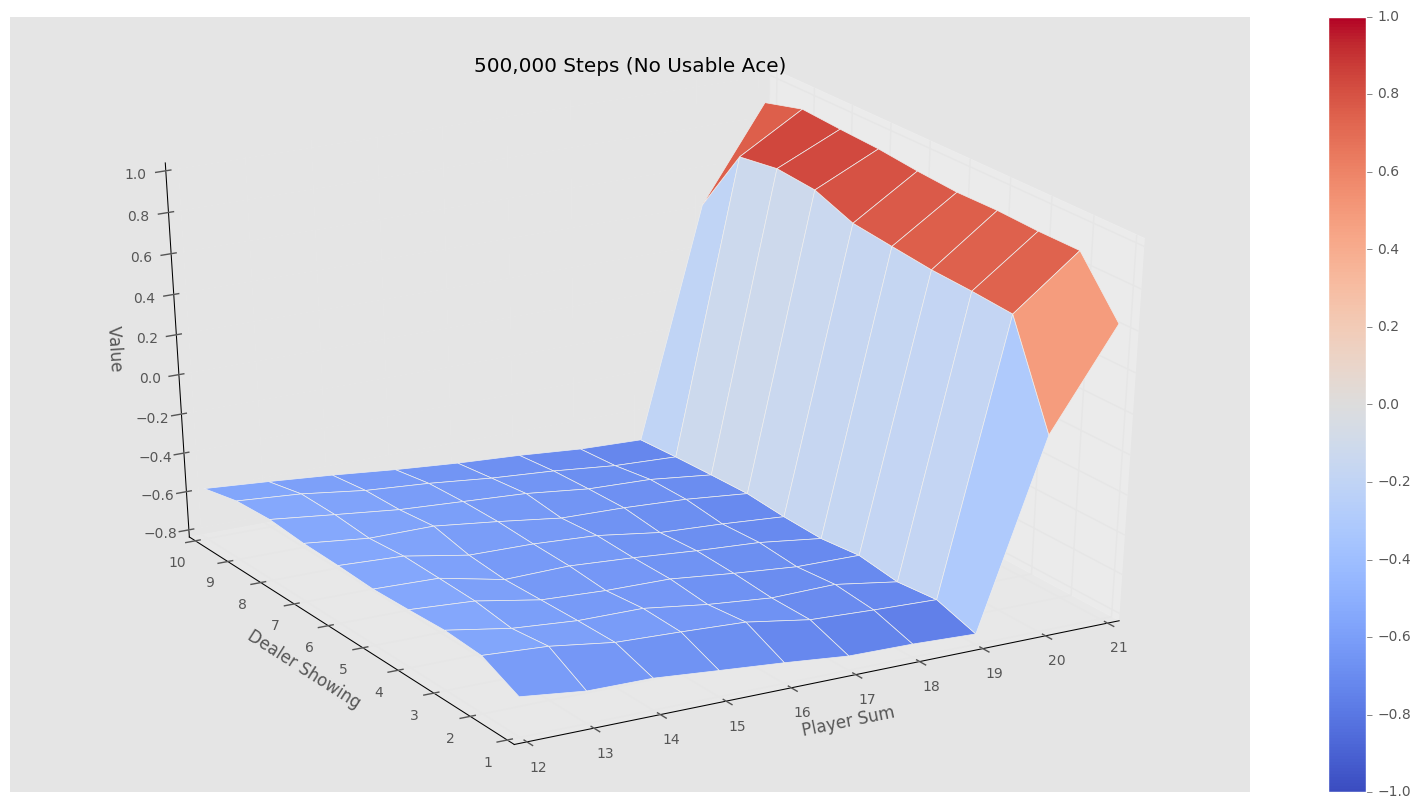

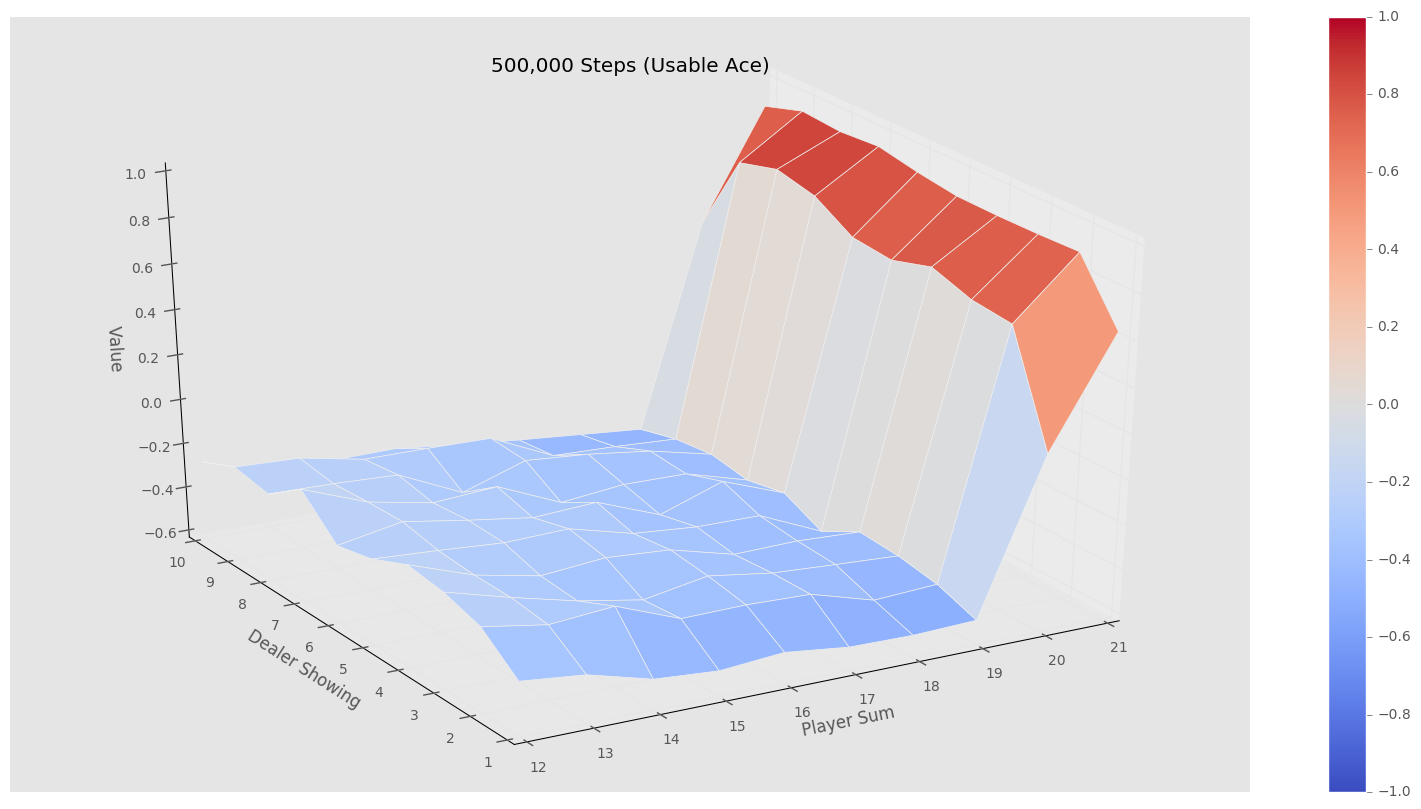

In [6]:
V_10k = mc_prediction(sample_policy, env, num_episodes=10000)
plotting.plot_value_function(V_10k, title="10,000 Steps")

V_500k = mc_prediction(sample_policy, env, num_episodes=500000)
plotting.plot_value_function(V_500k, title="500,000 Steps")